In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as snb
import matplotlib.pyplot as plt
import warnings as wn
wn.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from statsmodels.formula.api import ols

In [2]:
# additonal libaray for project
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
# load data sets

In [5]:
from sklearn.datasets import load_iris

In [6]:
dt=load_iris()

In [7]:
y=dt.target

In [8]:
x=dt.data

In [17]:
# dimension of data set

In [21]:
x,y.shape

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [22]:
# head of the data set

In [9]:
df=pd.DataFrame(x,columns=list("ABCD"))

In [10]:
df["y"]=y

In [11]:
Y=df["y"]

In [12]:
df.drop("y",axis=1,inplace=True)

In [13]:
df.head()

,A,B,C,D
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [118]:
# statistical summary

In [120]:
# data visulaization

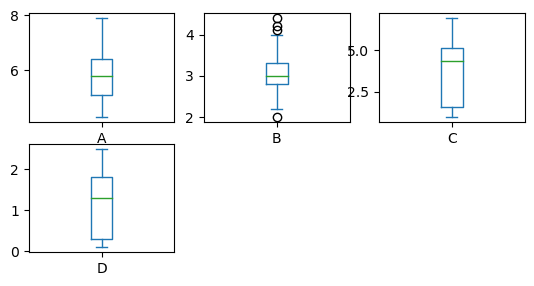

In [121]:
df.plot(kind="box",subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

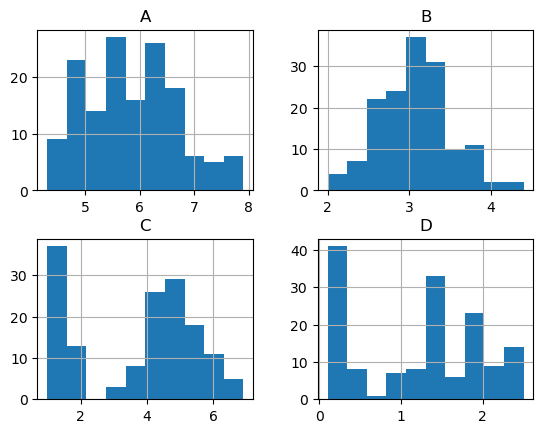

In [122]:
# histogram
df.hist()
plt.show()

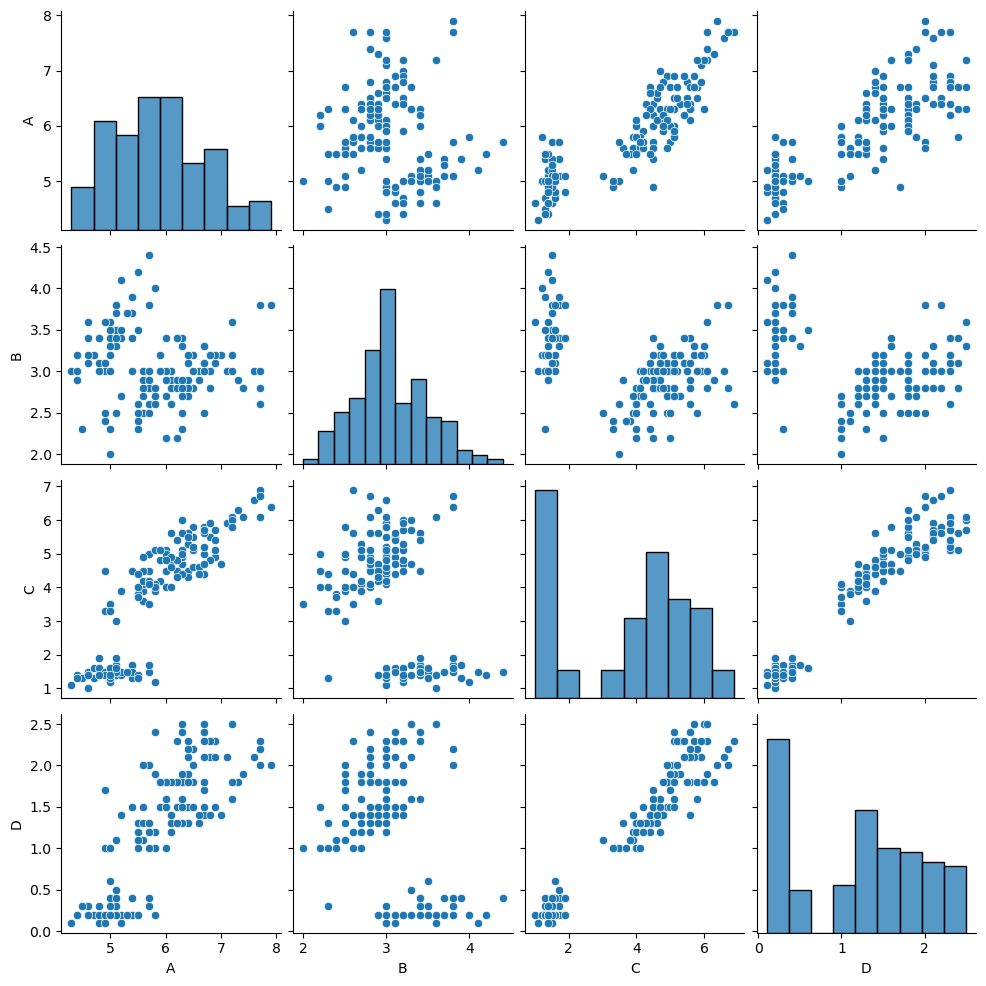

In [123]:
snb.pairplot(df)

In [124]:
# You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

In [15]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y)

In [137]:
# build model
# We don’t know which algorithms would be good on this problem or what configurations to use.

In [138]:
# We get an idea from the plots that some of the classes are partially linearly 
# separable in some dimensions, so we are expecting generally good results.

In [147]:
# spot check algorithms 
ls=[]
ls.append(("LR",LogisticRegression(solver="liblinear",multi_class="ovr")))
ls.append(("KNN",KNeighborsClassifier()))
ls.append(("DTC",DecisionTreeClassifier()))
ls.append(("NB",GaussianNB()))
ls.append(("SVM",SVC(gamma="auto")))

In [149]:
# evaluate each model in turn

In [1]:
from sklearn.model_selection import StratifiedGroupKFold,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [158]:
results=[]
names=[]
for name , model in ls:
    kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results =cross_val_score(model, Xtrain, Ytrain, cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(name,cv_results.mean(),cv_results.std())

LR 0.9636363636363635 0.04453617714151235
KNN 0.9734848484848484 0.04054976876082619
DTC 0.928030303030303 0.07911136969757886
NB 0.9553030303030303 0.04474830128976474
SVM 0.9734848484848484 0.04054976876082619


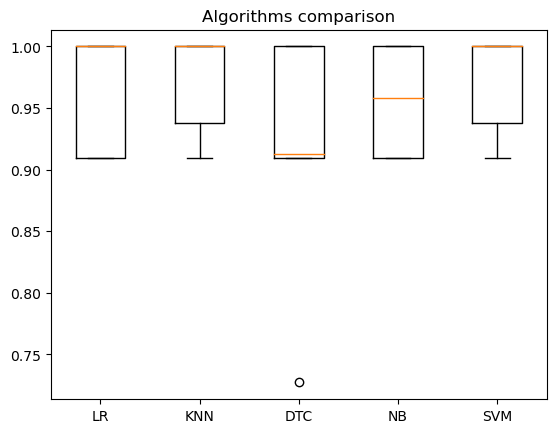

In [162]:
# compare algorithms
plt.boxplot(results,labels=names)
plt.title("Algorithms comparison")
plt.show()

In [171]:
# make predictions
mdl=SVC(gamma="scale")
mdl.fit(Xtrain,Ytrain)
yptrain=mdl.predict(Xtrain)
yptest=mdl.predict(Xtest)

In [174]:
# avaluation predicions
print(accuracy_score(yptrain,Ytrain))
print(confusion_matrix(yptrain,Ytrain))
print(classification_report(yptrain,Ytrain))

0.9732142857142857
[[37  0  0]
 [ 0 37  1]
 [ 0  2 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.97      0.96        38
           2       0.97      0.95      0.96        37

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



In [178]:
cross_val_score(LogisticRegression(),Xtrain,Ytrain,cv=20)

array([0.83333333, 1.        , 1.        , 0.83333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.8       , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [ ]:
# confusion matrix
# in cm there is glsory

In [6]:
from sklearn.datasets import make_classification

In [8]:
x,y=make_classification(n_features=10,n_informative=4)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [16]:
md=LogisticRegression()

In [17]:
md.fit(xtrain,ytrain)

LogisticRegression()

In [20]:
yproba=md.predict_proba(xtrain)[:,1]

In [23]:
from sklearn.metrics import accuracy_score,roc_curve

In [24]:
fpr,tpr,th=roc_curve(ytrain,yproba)

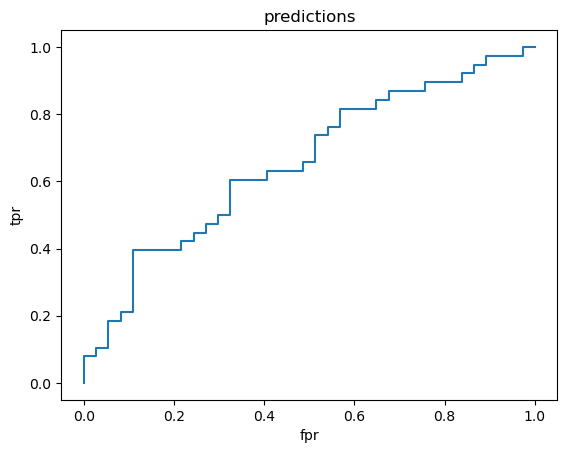

In [26]:
plt.title("predictions")
plt.ylabel("tpr")
plt.xlabel("fpr")
plt.plot(fpr,tpr)